Clasic:

In [1]:
from math import *
import numpy as np
from scipy.fftpack import fft, dct
import pandas as pd
import matplotlib.pyplot as plt

import librosa as lr#read and manipulate audio file
import librosa.display

In [2]:
#take file
#amplitudes-signal amplitude
#sfreq-nr timePoints/sec
amplitudes,sfreq =lr.load("ArchiveWAV/su.wav",11205)
time=np.arange(0,len(amplitudes))/sfreq #create time array

NameError: name 'lr' is not defined

In [3]:
#play sound
import IPython.display as ipd
ipd.Audio(amplitudes,rate=sfreq)

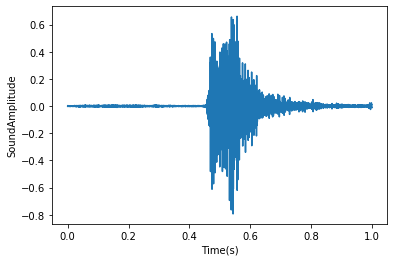

In [4]:
#plot amplitude
fig ,ax=plt.subplots()
ax.plot(time,amplitudes)
ax.set(xlabel='Time(s)',ylabel='SoundAmplitude')
plt.show()

C:\Users\Voicu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


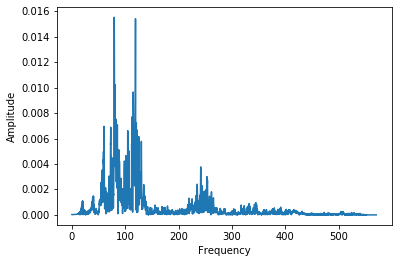

In [5]:
#applied fourier transform and plot 

famplitudes=fft(amplitudes)
n=len(amplitudes)
T=1/sfreq
yf=famplitudes
xf=np.linspace(0,0.1/(2.0*T)+10,n/2)
fig,ax=plt.subplots()
ax.plot(xf,2.0/n*np.abs(yf[:n//2]))
ax.set(xlabel='Frequency',ylabel='Amplitude')
plt.show()

In [6]:
#extract  max frequencies at time a-a+pastime class
def extractMaxClas(amplitudes,pastime,i):
    
    a=pastime*i
    pasamplitude=[amplitudes[k] for k in range(a,pastime*(i+1))]


    famplitudes=fft(pasamplitude)
    li=famplitudes
    
    fmax0=np.argmax(li)
   
    
    return fmax0,li

In [7]:
pastime=int(pow(2,5))
compres=int(len(time)/pastime)
compresTime=[i for i in range(compres)]
CFMAX0=np.zeros(compres) 
CfTlist=[[0]for i in range(compres)]
 
for i in range (compres):
    CFMAX0[i],CfTlist[i]=extractMaxClas(amplitudes,pastime,i)

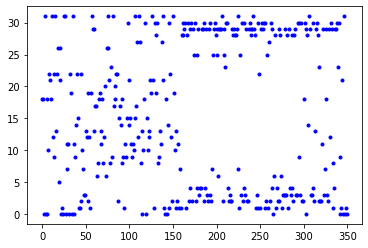

In [8]:
plt.plot(compresTime, CFMAX0, 'b.')
plt.show()

In [9]:
''' 
def normat(amplitudes):
    
    s=0
    n=len(amplitudes)
    for i in range(len(amplitudes)):
        s=s+amplitudes[i]*amplitudes[i]
    s=np.sqrt(s)
    for i in range(len(amplitudes)):
        amplitudes[i]=amplitudes[i]/s
    return amplitudes

anorm=normat(amplitudes)

pastime=int(pow(2,5))
compres=int(len(time)/pastime)
compresTime=[i for i in range(compres)]
CFMAX0=np.zeros(compres) 
clasicfTlist=[[0][0]for i in range(compres)]
 
for i in range (compres):
    CFMAX0[i],clasicfTlist[i]=extractMaxClas(anorm,pastime,i)
    
plt.plot(compresTime, CFMAX0, 'b.')
plt.show()
''' 

" \ndef normat(amplitudes):\n    \n    s=0\n    n=len(amplitudes)\n    for i in range(len(amplitudes)):\n        s=s+amplitudes[i]*amplitudes[i]\n    s=np.sqrt(s)\n    for i in range(len(amplitudes)):\n        amplitudes[i]=amplitudes[i]/s\n    return amplitudes\n\nanorm=normat(amplitudes)\n\npastime=int(pow(2,5))\ncompres=int(len(time)/pastime)\ncompresTime=[i for i in range(compres)]\nCFMAX0=np.zeros(compres) \nclasicfTlist=[[0][0]for i in range(compres)]\n \nfor i in range (compres):\n    CFMAX0[i],clasicfTlist[i]=extractMaxClas(anorm,pastime,i)\n    \nplt.plot(compresTime, CFMAX0, 'b.')\nplt.show()\n"

Quantum code

In [10]:
#import Qiskit

from qiskit import BasicAer, Aer ,IBMQ
from qiskit.aqua.components.qfts import Standard as qft

from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit,execute

from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram


In [11]:
IBMQ.save_account('ae3eea413b98f53a07979e58a63c61020eec0e5de949c370ac79fa791d98156e501e3aa29ab16b64e4207aade400753052d2180597599117f286a726175bc899')

Credentials already present. Set overwrite=True to overwrite.


In [12]:
#provider=IBMQ.load_account()
#backend=provider.get_backend('ibmq_qasm_simulator')
backend = Aer.get_backend('qasm_simulator')

In [13]:
#convert to quantum format
def get_StatevectorFromSpec(amplitudes):
    
    n=int(np.log2(len(amplitudes)))# nr of qubits
    n2=pow(2,n);n2=int(n2) #nr of possible states 
    
    minimum = min(amplitudes[0:n2])
    amplitudeq=[amplitudes[i]  for i in range(0,n2)] # only 2^k elemt can be store  => the new sound will be shorter 
    m=len(amplitudeq)
    ssum=0
    for i in range(m):
        ssum+=amplitudeq[i]**2 

    stateVector=[complex(amplitudeq[i]/np.sqrt(ssum)) for i in range(m)] # because is a state vector sum over all items must be 1 
    floatStatevector=[amplitudeq[i]/np.sqrt(ssum) for i in range(m)]
    return stateVector,floatStatevector

def get_pozitivStatevectorFromSpec(amplitudes):
    
    n=int(np.log2(len(amplitudes)))# nr of qubits
    n2=pow(2,n);n2=int(n2) #nr of possible states 
    
    minimum = min(amplitudes[0:n2])
    amplitudeq=[amplitudes[i]+1  for i in range(0,n2)] # move to 0-2  I want positive amplitudes (0.3^2=(-0.3)^2 -wiill be an overlab wen make mesurements) and only 2^k elemt can be store  => the new sound will be shorter 
    m=len(amplitudeq)
    ssum=0
    for i in range(m):
        ssum+=amplitudeq[i]**2 

    floatStatevector=[amplitudeq[i]/np.sqrt(ssum) for i in range(m)]
    stateVector=[complex(floatStatevector[i]) for i in range(m)] # because is a state vector sum over all items must be 1 
    
    return stateVector,floatStatevector

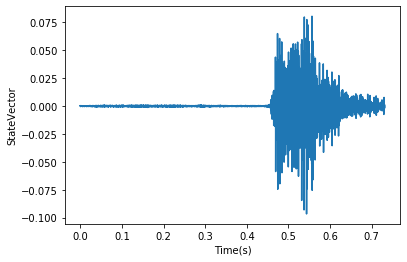

In [14]:

stateVector,floatStateVector=get_StatevectorFromSpec(amplitudes)
pozitivStateVector,floatpozitivStateVector=get_pozitivStatevectorFromSpec(amplitudes)
n2=len(stateVector)
#lost the last part because 2^k 
Time=[time[i] for i in range(n2)]

#plot Statevector (t)
fig ,ax=plt.subplots()
ax.plot(Time,floatStateVector)
ax.set(xlabel='Time(s)',ylabel='StateVector')
plt.show()

In [15]:
#extract amplitudes from counts
def extractAmplitudesfromCounts(n2,counts,shots):
    
    amplitudes=np.zeros(n2)
    
    key_max = max(counts.keys(), key=(lambda k: counts[k]))
    max_val = counts[key_max]
    med = shots/n2
    
    for key in counts:
        i=int(key,2)
        val=counts[key] 
        amplitudes[i]=(counts[key] - med)/max_val
        
    return amplitudes

def extractAmplitudesfromCounts2(n2, counts, shots):
    #extract amplitudes from counts
    Amplitudes=[0*i for i in range (n2)]
    for key in counts:
        i=int(key,2)
        val=(counts[key]) 
        Amplitudes[i]=val
    for i in range(n2):
        Amplitudes[i]=(Amplitudes[i]*100/shot) #100 just for amplification
        
    return Amplitudes

In [16]:
'''  
#Now wea apply FT

from qiskit.aqua.components.qfts import Standard as qft

n=int(np.log2(len(stateVector)))
fq=QuantumRegister(n,'q')
fc=ClassicalRegister(n,'c')
fqc=QuantumCircuit(fq,fc)

fqc.initialize(stateVector,fq) 

qft(n).construct_circuit(qubits=fq,circuit=fqc)

fqc.measure(range(n), range(n))

#nr of shots is small if we are interested the in string frequences even lower if we are interested only in the dominant frequency
#provider=IBMQ.load_account()
#backend=provider.get_backend('ibmq_qasm_simulator')
backend = Aer.get_backend('qasm_simulator')
shot=100
fcounts=execute(fqc,backend=backend,shots=shot).result().get_counts(fqc)

#plot_histogram(fcounts, sort='asc') 

#applied fourier transform and plot 

FAmplitudes=extractAmplitudesfromCounts2(n2,fcounts,shot)
n=len(amplitudes)
T=1/sfreq
yf=FAmplitudes
xf=np.linspace(0,0.1/(2.0*T)+10,n/2)
fig,ax=plt.subplots()
ax.plot(xf,2.0/n*np.abs(yf[:n//2]))
plt.show()

#max frequencies in time 

key_max = max(fcounts.keys(), key=(lambda k: fcounts[k]))
max_val = fcounts[key_max]

fmax=int(key_max ,2)
print(fmax)
plot_histogram(fcounts, sort='asc')

''' 

"  \n#Now wea apply FT\n\nfrom qiskit.aqua.components.qfts import Standard as qft\n\nn=int(np.log2(len(stateVector)))\nfq=QuantumRegister(n,'q')\nfc=ClassicalRegister(n,'c')\nfqc=QuantumCircuit(fq,fc)\n\nfqc.initialize(stateVector,fq) \n\nqft(n).construct_circuit(qubits=fq,circuit=fqc)\n\nfqc.measure(range(n), range(n))\n\n#nr of shots is small if we are interested the in string frequences even lower if we are interested only in the dominant frequency\n#provider=IBMQ.load_account()\n#backend=provider.get_backend('ibmq_qasm_simulator')\nbackend = Aer.get_backend('qasm_simulator')\nshot=100\nfcounts=execute(fqc,backend=backend,shots=shot).result().get_counts(fqc)\n\n#plot_histogram(fcounts, sort='asc') \n\n#applied fourier transform and plot \n\nFAmplitudes=extractAmplitudesfromCounts2(n2,fcounts,shot)\nn=len(amplitudes)\nT=1/sfreq\nyf=FAmplitudes\nxf=np.linspace(0,0.1/(2.0*T)+10,n/2)\nfig,ax=plt.subplots()\nax.plot(xf,2.0/n*np.abs(yf[:n//2]))\nplt.show()\n\n#max frequencies in time \n\n

Now we cut our time in little pieces to find max frequencies at some point in time

In [17]:
#pastime- size of a time piece
#OBS !! now only 5 qbits are e enought
pt=5
pastime=int(pow(2,pt)) 
st=0

In [18]:
def createCirc(stateVector,shot,backend) :
    n=int(np.log2(len(stateVector)))
    fq=QuantumRegister(n,'q')
    fc=ClassicalRegister(n,'c')
    fqc=QuantumCircuit(fq,fc)

    fqc.initialize(stateVector,fq) 

    qft(n).construct_circuit(qubits=fq,circuit=fqc)

    fqc.measure(range(n), range(n))
    
    pfcounts=execute(fqc,backend=backend,shots=shot).result().get_counts(fqc)
    
    return pfcounts

In [19]:
'''  
i=9
a=pastime*i
pasamplitude=[amplitudes[k] for k in range(a,pastime*(i+1))]

passtatevector,floatPasstatevector=get_pozitivStatevectorFromSpec(pasamplitude)
shot=100

n=int(np.log2(len(passtatevector)))
fq=QuantumRegister(n,'q')
fc=ClassicalRegister(n,'c')
fqc=QuantumCircuit(fq,fc)

fqc.initialize(passtatevector,fq) 

qft(n).construct_circuit(qubits=fq,circuit=fqc)

fqc.measure(range(n), range(n))
    
pfcounts=execute(fqc,backend=backend,shots=shot).result().get_counts(fqc)

n2p=pow(2,pt);n2p=int(n2p) #nr of possible states 
FAmplitudes=extractAmplitudesfromCounts2(pastime,pfcounts,shot)
n=len(pasamplitude)
T=1/sfreq
yf=FAmplitudes
xf=np.linspace(0,0.1/(2.0*T)+10,n/2)
fig,ax=plt.subplots()
ax.plot(xf,2.0/n*np.abs(yf[:n//2]))
plt.show()
'''  

"  \ni=9\na=pastime*i\npasamplitude=[amplitudes[k] for k in range(a,pastime*(i+1))]\n\npasstatevector,floatPasstatevector=get_pozitivStatevectorFromSpec(pasamplitude)\nshot=100\n\nn=int(np.log2(len(passtatevector)))\nfq=QuantumRegister(n,'q')\nfc=ClassicalRegister(n,'c')\nfqc=QuantumCircuit(fq,fc)\n\nfqc.initialize(passtatevector,fq) \n\nqft(n).construct_circuit(qubits=fq,circuit=fqc)\n\nfqc.measure(range(n), range(n))\n    \npfcounts=execute(fqc,backend=backend,shots=shot).result().get_counts(fqc)\n\nn2p=pow(2,pt);n2p=int(n2p) #nr of possible states \nFAmplitudes=extractAmplitudesfromCounts2(pastime,pfcounts,shot)\nn=len(pasamplitude)\nT=1/sfreq\nyf=FAmplitudes\nxf=np.linspace(0,0.1/(2.0*T)+10,n/2)\nfig,ax=plt.subplots()\nax.plot(xf,2.0/n*np.abs(yf[:n//2]))\nplt.show()\n"

In [20]:
#extract  max frequencies at time a-a+pastime
def extractMaxFr3(amplitudes,pastime,i,backend):
    
    a=pastime*i
    pasamplitude=[amplitudes[k] for k in range(a,pastime*(i+1))]

    passtatevector,floatPstatevector=get_StatevectorFromSpec(pasamplitude)

    
    shot=10000 
    fcounts=createCirc(passtatevector,shot,backend)

    A=np.zeros(len(amplitudes))
    for key in fcounts:
        o=int(key,2)
        val=fcounts[key] 
        A[o]=fcounts[key] 
    li=[np.abs(A[o])for o in range (int(len(A)/2))]
    
    fmax0=np.argmax(li)
   
   
    return fmax0,li

In [21]:

compres=int(len(time)/pastime)
compresTime=[i for i in range(compres)]
FMAX0=np.zeros(compres) 
fTlist=[[0]for i in range(compres)]
 
for i in range (compres):
    FMAX0[i],fTlist[i]=extractMaxFr3(amplitudes,pastime,i,backend)

C:\Users\Voicu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


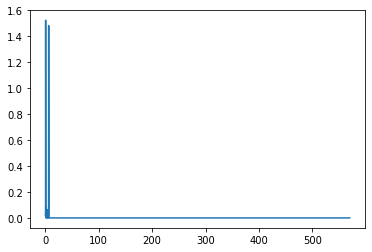

In [22]:
FAmplitudes=fTlist[200]
n=len(fTlist[200])
T=1/sfreq
yf=FAmplitudes
xf=np.linspace(0,0.1/(2.0*T)+10,n/2)
fig,ax=plt.subplots()
ax.plot(xf,2.0/n*np.abs(yf[:n//2]))
plt.show()

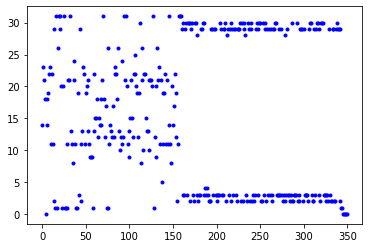

In [23]:
#max frequency
plt.plot(compresTime, FMAX0, 'b.')
plt.show()